1. MNIST ma’lumotlarini tayyorlash





torchvision kutubxonasi yordamida MNIST ma’lumotlar to‘plamini yuklab oling.



Ma’lumotlarni tensorlarga o‘tkazing.



DataLoader yordamida o‘rgatish uchun tayyorlang.

2. Model arxitekturasini yaratish

Kiruvchi qatlamda 784 ta neyron (28x28 piksel), yashirin qatlamda 128 ta neyron (ReLU aktivatsiya funksiyasi bilan) va chiquvchi qatlamda 10 ta neyron (0 dan 9 gacha bo‘lgan raqamlar uchun) bo‘lgan nn.Sequential modelini yarating.

3. Yo‘qotish funksiyasi va optimayzerni sozlash

Ko‘p klassli tasniflash uchun nn.CrossEntropyLoss yo‘qotish funksiyasini va optim.SGD optimayzerini lr=0.01 (learning rate) bilan sozlang.

4. Modelni shug‘ullantirish va natijani tahlil qilish





5 ta epocha davomida modelni shug‘ullantiradigan tsikl yarating.



Har bir epocha oxirida o‘rtacha yo‘qotish qiymatini ekranga chiqaring.



Shug‘ullantirish jarayonidan so‘ng yo‘qotish grafigini chizing.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

Transform (tensor ga o‘tkazish)

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Rasmni Tensor ga o‘tkazadi (0-1 oralig‘iga ham normallashtiradi)
])

Datasetni yuklab olish

In [5]:
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)


100%|██████████| 9.91M/9.91M [00:00<00:00, 12.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 338kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.21MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.41MB/s]


DataLoader orqali o‘rgatishga tayyorlash

In [7]:
X = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True
)

y = DataLoader(
    dataset=test_dataset,
    batch_size=32,
    shuffle=False
)


Model

In [8]:
model = nn.Sequential(
    nn.Flatten(),            # (1, 28, 28) → (784)
    nn.Linear(28*28, 128),   # 784 → 128
    nn.ReLU(),               # Aktivatsiya
    nn.Linear(128, 10)       # 128 → 10 (0-9 raqamlar)
)

Yo‘qotish funksiyasi va optimayzerni sozlash

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

 Modelni shug‘ullantirish va natijani tahlil qilish

In [13]:
epochs = 5
losses = []

for epoch in range(epochs):
    running_loss = 0.0

    for images, labels in X:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(X)
    losses.append(avg_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Average Loss: {avg_loss:.4f}")


Epoch [1/5], Average Loss: 0.8883
Epoch [2/5], Average Loss: 0.3775
Epoch [3/5], Average Loss: 0.3232
Epoch [4/5], Average Loss: 0.2938
Epoch [5/5], Average Loss: 0.2718


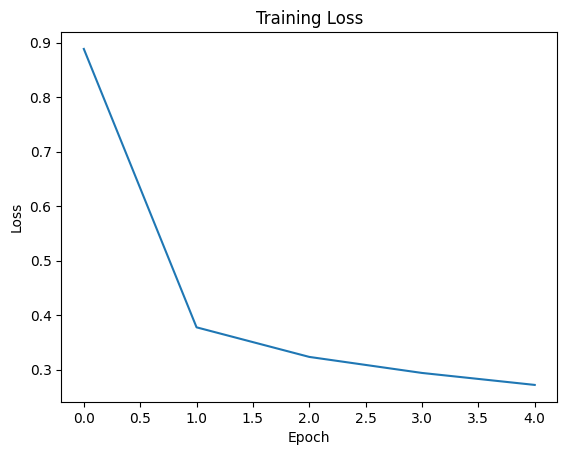

In [14]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()